<a href="https://colab.research.google.com/github/diegosol127/CSCE-636-Deep-Learning/blob/main/other/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
import pickle
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
rng = np.random.default_rng()

## Load Data

In [ ]:
train_input = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/DS_5_train_input",'rb'))
train_output = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/DS_5_train_output",'rb')) 

In [ ]:
train_input[0]

'a g b f a f a e a k a j c f b f c d a k a k c e b g a h a k b d b f b f b d c d '

In [ ]:
train_output[0]

'b f c f b f c d a j e f g c e b g a k i j b d b f a k l m b f b d a h ed ee ef a k k eg a k h eh a e ei c d a f ej ek a g d el '

## Vectorize Data

In [ ]:
train_output_start = []
train_output_end = []

for i in range(0,len(train_output)):
  train_output_start.append("start " + train_output[i])
  train_output_end.append(train_output[i]+"end")
  train_output[i] = "start " + train_output[i] + "end"

source_vectorization = layers.TextVectorization(output_sequence_length=200)
target_vectorization = layers.TextVectorization(output_sequence_length=200)
source_vectorization.adapt(train_input)
target_vectorization.adapt(train_output)

train_input = source_vectorization(train_input)
train_output = target_vectorization(train_output)
train_output_end = target_vectorization(train_output_end)
train_output_start = target_vectorization(train_output_start)

In [ ]:
source_vectorization.get_vocabulary()

['', '[UNK]', 'a', 'b', 'c', 'e', 'g', 'd', 'f', 'k', 'i', 'j', 'h']

In [ ]:
target_vectorization.get_vocabulary()

['',
 '[UNK]',
 'a',
 'b',
 'c',
 'e',
 'g',
 'd',
 'f',
 'k',
 'i',
 'j',
 'h',
 'start',
 'm',
 'l',
 'end',
 'eh',
 'eg',
 'ef',
 'ee',
 'ed',
 'ei',
 'ej',
 'ek',
 'el',
 'em',
 'fd',
 'fe',
 'ff',
 'fg',
 'fh',
 'fi',
 'fj',
 'fk',
 'fl',
 'fm',
 'gd']

In [ ]:
train_input[0]

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([ 2,  6,  3,  8,  2,  8,  2,  5,  2,  9,  2, 11,  4,  8,  3,  8,  4,
        7,  2,  9,  2,  9,  4,  5,  3,  6,  2, 12,  2,  9,  3,  7,  3,  8,
        3,  8,  3,  7,  4,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])>

In [ ]:
train_output[0]

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([13,  3,  8,  4,  8,  3,  8,  4,  7,  2, 11,  5,  8,  6,  4,  5,  3,
        6,  2,  9, 10, 11,  3,  7,  3,  8,  2,  9, 15, 14,  3,  8,  3,  7,
        2, 12, 21, 20, 19,  2,  9,  9, 18,  2,  9, 12, 17,  2,  5, 22,  4,
        7,  2,  8, 23, 24,  2,  6,  7, 25, 16,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])>

In [ ]:
train_output_start[0]

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([13,  3,  8,  4,  8,  3,  8,  4,  7,  2, 11,  5,  8,  6,  4,  5,  3,
        6,  2,  9, 10, 11,  3,  7,  3,  8,  2,  9, 15, 14,  3,  8,  3,  7,
        2, 12, 21, 20, 19,  2,  9,  9, 18,  2,  9, 12, 17,  2,  5, 22,  4,
        7,  2,  8, 23, 24,  2,  6,  7, 25,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])>

In [ ]:
train_output_end[0]

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([ 3,  8,  4,  8,  3,  8,  4,  7,  2, 11,  5,  8,  6,  4,  5,  3,  6,
        2,  9, 10, 11,  3,  7,  3,  8,  2,  9, 15, 14,  3,  8,  3,  7,  2,
       12, 21, 20, 19,  2,  9,  9, 18,  2,  9, 12, 17,  2,  5, 22,  4,  7,
        2,  8, 23, 24,  2,  6,  7, 25, 16,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0])>

# RNN

Encoder

In [ ]:
embed_dim = 256
latent_dim = 1024

source = keras.Input(shape=(None,), dtype="int64")
x = layers.Embedding(train_input.shape[-1], embed_dim, mask_zero=True)(source)
encoded_source = layers.Bidirectional(
    layers.GRU(latent_dim), merge_mode="sum")(x)

Decoder Section

In [ ]:
past_target = keras.Input(shape=(None,), dtype="int64")
x = layers.Embedding(train_output_start.shape[-1], embed_dim, mask_zero=True)(past_target)
decoder_gru = layers.GRU(latent_dim, return_sequences=True)
x = decoder_gru(x, initial_state=encoded_source)
x = layers.Dropout(0.5)(x)
target_next_step = layers.Dense(train_output_start.shape[-1], activation="softmax")(x)
seq2seq_rnn = keras.Model([source, past_target], target_next_step)

In [ ]:
seq2seq_rnn.summary()
tf.keras.utils.plot_model(seq2seq_rnn, show_shapes=True)

In [ ]:
seq2seq_rnn.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="seq2seq_rnn.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = seq2seq_rnn.fit(x=[train_input,train_output_start],y=train_output_end,epochs=50,batch_size=64,validation_split=.2,callbacks=callbacks)

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Transformer

## Encoder

In [ ]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

## Decoder

In [ ]:
class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1),
             tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(
                mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)
        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask)
        attention_output_1 = self.layernorm_1(inputs + attention_output_1)
        attention_output_2 = self.attention_2(
            query=attention_output_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        attention_output_2 = self.layernorm_2(
            attention_output_1 + attention_output_2)
        proj_output = self.dense_proj(attention_output_2)
        return self.layernorm_3(attention_output_2 + proj_output)

## PositionalEmbedding

In [ ]:
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    # Always called, return None for no mask
    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config

## End to End

In [ ]:
embed_dim = 256
num_heads = 8
dense_dim = 1024

vocab_size_source = 13
vocab_size_output = 38
sequence_length = 200

encoder_inputs = keras.Input(shape=(None,))
x = PositionalEmbedding(sequence_length, vocab_size_source, embed_dim)(encoder_inputs)
encoder_outputs = TransformerEncoder(embed_dim, dense_dim, num_heads)(x)

decoder_inputs = keras.Input(shape=(None,))
x = PositionalEmbedding(sequence_length, vocab_size_output, embed_dim)(decoder_inputs)
x = TransformerDecoder(embed_dim, dense_dim, num_heads)(x, encoder_outputs)

x = layers.Dropout(0.5)(x)
decoder_outputs = layers.Dense(vocab_size_output, activation="softmax")(x)
transformer = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 positional_embedding_2 (Positi  (None, None, 256)   54528       ['input_3[0][0]']                
 onalEmbedding)                                                                                   
                                                                                                  
 positional_embedding_3 (Positi  (None, None, 256)   60928       ['input_4[0][0]']          

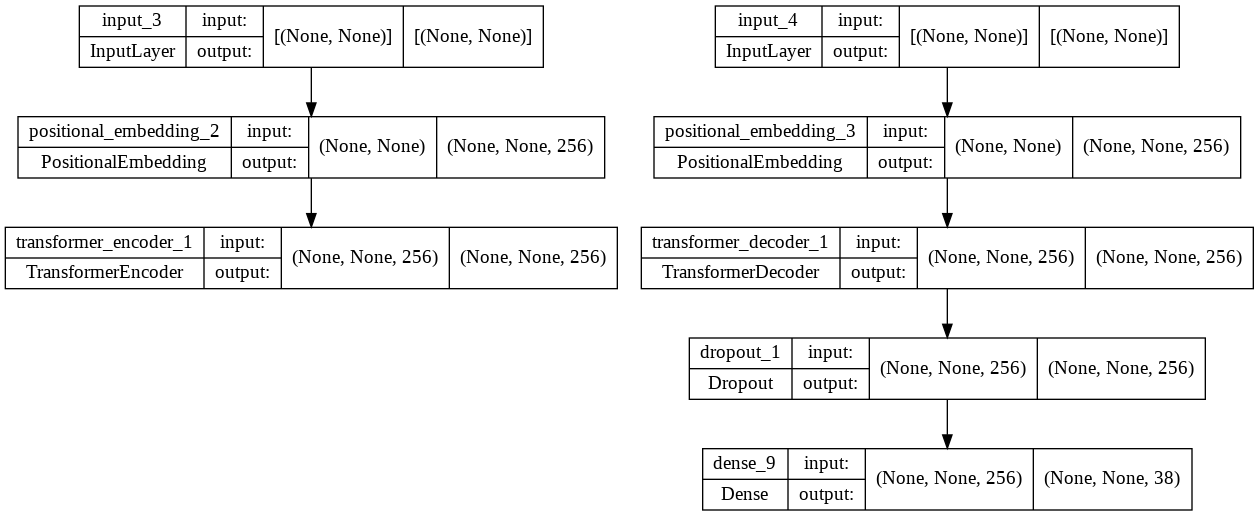

In [ ]:
transformer.summary()
tf.keras.utils.plot_model(transformer, show_shapes=True)

In [ ]:
transformer.compile(
    optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="/content/drive/MyDrive/Colab Notebooks/transformer.keras",
        save_best_only=True,
        monitor="val_loss"),
    keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        verbose=1,
        restore_best_weights=True)
]

history = transformer.fit(x=[train_input,train_output_start],y=train_output_end,epochs=100,batch_size=64,validation_split=.2,callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 22s 235ms/step - loss: 1.1711 - accuracy: 0.1217 - val_loss: 0.7446 - val_accuracy: 0.2118
Epoch 2/100
63/63 [==============================] - 15s 232ms/step - loss: 0.6861 - accuracy: 0.2719 - val_loss: 0.5573 - val_accuracy: 0.3369
Epoch 3/100
63/63 [==============================] - 15s 231ms/step - loss: 0.5919 - accuracy: 0.3188 - val_loss: 0.5481 - val_accuracy: 0.3585
Epoch 4/100
63/63 [==============================] - 15s 232ms/step - loss: 0.5495 - accuracy: 0.3488 - val_loss: 0.5118 - val_accuracy: 0.3682
Epoch 5/100
63/63 [==============================] - 14s 221ms/step - loss: 0.5231 - accuracy: 0.3699 - val_loss: 0.5280 - val_accuracy: 0.3634
Epoch 6/100
63/63 [==============================] - 15s 234ms/step - loss: 0.5035 - accuracy: 0.3841 - val_loss: 0.4464 - val_accuracy: 0.4337
Epoch 7/100
63/63 [==============================] - 14s 220ms/step - loss: 0.4905 - accuracy: 0.3959 - val_loss: 0.4732 - val_accuracy:

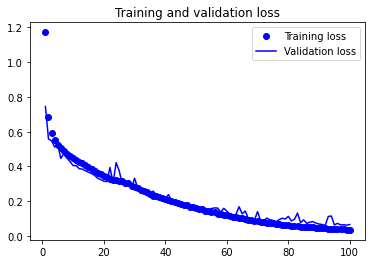

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

# Inference/Test

## Load Libraries/Classes/Methods

In [ ]:
import pickle
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
rng = np.random.default_rng()

class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs, mask=None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
        attention_output = self.attention(
            inputs, inputs, attention_mask=mask)
        proj_input = self.layernorm_1(inputs + attention_output)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

class TransformerDecoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        self.attention_1 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.attention_2 = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=embed_dim)
        self.dense_proj = keras.Sequential(
            [layers.Dense(dense_dim, activation="relu"),
             layers.Dense(embed_dim),]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.layernorm_3 = layers.LayerNormalization()
        self.supports_masking = True

    def get_config(self):
        config = super().get_config()
        config.update({
            "embed_dim": self.embed_dim,
            "num_heads": self.num_heads,
            "dense_dim": self.dense_dim,
        })
        return config

    def get_causal_attention_mask(self, inputs):
        input_shape = tf.shape(inputs)
        batch_size, sequence_length = input_shape[0], input_shape[1]
        i = tf.range(sequence_length)[:, tf.newaxis]
        j = tf.range(sequence_length)
        mask = tf.cast(i >= j, dtype="int32")
        mask = tf.reshape(mask, (1, input_shape[1], input_shape[1]))
        mult = tf.concat(
            [tf.expand_dims(batch_size, -1),
             tf.constant([1, 1], dtype=tf.int32)], axis=0)
        return tf.tile(mask, mult)

    def call(self, inputs, encoder_outputs, mask=None):
        causal_mask = self.get_causal_attention_mask(inputs)
        if mask is not None:
            padding_mask = tf.cast(
                mask[:, tf.newaxis, :], dtype="int32")
            padding_mask = tf.minimum(padding_mask, causal_mask)
        attention_output_1 = self.attention_1(
            query=inputs,
            value=inputs,
            key=inputs,
            attention_mask=causal_mask)
        attention_output_1 = self.layernorm_1(inputs + attention_output_1)
        attention_output_2 = self.attention_2(
            query=attention_output_1,
            value=encoder_outputs,
            key=encoder_outputs,
            attention_mask=padding_mask,
        )
        attention_output_2 = self.layernorm_2(
            attention_output_1 + attention_output_2)
        proj_output = self.dense_proj(attention_output_2)
        return self.layernorm_3(attention_output_2 + proj_output)

class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.token_embeddings = layers.Embedding(
            input_dim=input_dim, output_dim=output_dim)
        self.position_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        self.sequence_length = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim

    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start=0, limit=length, delta=1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.position_embeddings(positions)
        return embedded_tokens + embedded_positions

    # Always called, return None for no mask
    def compute_mask(self, inputs, mask=None):
        return tf.math.not_equal(inputs, 0)

    def get_config(self):
        config = super(PositionalEmbedding, self).get_config()
        config.update({
            "output_dim": self.output_dim,
            "sequence_length": self.sequence_length,
            "input_dim": self.input_dim,
        })
        return config

encoder_vectorize = tf.keras.layers.TextVectorization(output_mode='int', output_sequence_length=200, vocabulary= ['', '[UNK]', 'a', 'b', 'c', 'e', 'g', 'd', 'f', 'k', 'i', 'j', 'h'])
decoder_vectorize = tf.keras.layers.TextVectorization(output_mode='int', output_sequence_length=200, vocabulary= ['', '[UNK]', 'a', 'b', 'c', 'e', 'g', 'd', 'f', 'k', 'i', 'j', 'h', 'start', 'm', 'l', 'end', 'eh', 'eg', 'ef', 'ee', 'ed', 'ei', 'ej', 'ek', 'el', 'em', 'fd', 'fe', 'ff', 'fg', 'fh', 'fi', 'fj', 'fk', 'fl', 'fm', 'gd'])
inverse_vectorize = dict(zip(range(38), ['', '[UNK]', 'a', 'b', 'c', 'e', 'g', 'd', 'f', 'k', 'i', 'j', 'h', 'start', 'm', 'l', 'end', 'eh', 'eg', 'ef', 'ee', 'ed', 'ei', 'ej', 'ek', 'el', 'em', 'fd', 'fe', 'ff', 'fg', 'fh', 'fi', 'fj', 'fk', 'fl', 'fm', 'gd']))

# def decode_sequence(input_sentence):
#   outputs = []
#   for j in range(0, input_sentence.shape[0]):
#       decoded_sentence = np.asarray(["start"])
#       for i in range(0, 200):
#           predictions = transformer([input_sentence[j:j+1], decoder_vectorize(decoded_sentence)])
#           sampled_token_index = np.argmax(predictions[0, i, :])
#           sampled_token = inverse_vectorize[sampled_token_index]
#           if sampled_token == "end":
#             break
#           decoded_sentence = np.char.add(decoded_sentence, " ")
#           decoded_sentence = np.char.add(decoded_sentence, sampled_token)
#       outputs.append(decoded_sentence[0][6:])
#   return outputs

# def decode_sequence(input_sentence):
#   outputs = []
#   for j in range(0, input_sentence.shape[0]):
#       decoded_sentence = np.asarray(["start"])
#       temp = encoder_path(input_sentence[j:j+1])
#       for i in range(0, 200):
#           predictions = decoder_path([decoder_vectorize(decoded_sentence),temp])
#           sampled_token_index = np.argmax(predictions[0, i, :])
#           sampled_token = inverse_vectorize[sampled_token_index]
#           if sampled_token == "end":
#             break
#           decoded_sentence = np.char.add(decoded_sentence, " ")
#           decoded_sentence = np.char.add(decoded_sentence, sampled_token)
#       outputs.append(decoded_sentence[0][6:])
#   return outputs

# def decode_sequence(input_sentence):
#   outputs = []
#   temp = encoder_path(input_sentence)
#   for j in range(0, input_sentence.shape[0]):
#       decoded_sentence = np.asarray(["start"])
#       for i in range(0, 200):
#           predictions = decoder_path([decoder_vectorize(decoded_sentence),temp[j:j+1]])
#           sampled_token_index = np.argmax(predictions[0, i, :])
#           sampled_token = inverse_vectorize[sampled_token_index]
#           if sampled_token == "end":
#             break
#           decoded_sentence = np.char.add(decoded_sentence, " ")
#           decoded_sentence = np.char.add(decoded_sentence, sampled_token)
#       outputs.append(decoded_sentence[0][6:])
#   return outputs

def decode_sequence(input_chunk):
  encoded_chunk = encoder_path(input_chunk)
  decoded_chunk = np.asarray(["start"])
  decoded_chunk = np.repeat(decoded_chunk,input_chunk.shape[0])
  for i in range(0, 200):
    predictions = decoder_path([decoder_vectorize(decoded_chunk),encoded_chunk])
    sampled_token_index = np.argmax(predictions[:, i, :], axis=1)
    sampled_token = np.vectorize(inverse_vectorize.get)(sampled_token_index)
    decoded_chunk = np.char.add(decoded_chunk, " ")
    decoded_chunk = np.char.add(decoded_chunk, sampled_token)
  return decoded_chunk

In [ ]:
temp = encoder_path(test_input[0:100])
temp.shape

TensorShape([100, 200, 256])

In [ ]:
decoded_sentence = np.asarray(["start"])
decoded_sentence = np.repeat(decoded_sentence,test_input[0:100].shape[0])
decoded_sentence.shape

(100,)

In [ ]:
predictions = decoder_path([decoder_vectorize(decoded_sentence),temp])
predictions.shape

TensorShape([100, 200, 38])

In [ ]:
sampled_token_index = np.argmax(predictions[:, 0, :], axis=1)
sampled_token_index.shape

(100,)

In [ ]:
sampled_token_index

array([3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 3, 4, 4, 4, 3, 3,
       3, 3, 3, 3, 4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       4, 3, 4, 4, 3, 4, 4, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4,
       4, 4, 4, 4, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3, 3, 4, 3, 4, 3,
       3, 3, 3, 3, 3, 4, 3, 4, 4, 4, 3, 4])

In [ ]:
sampled_token = np.vectorize(inverse_vectorize.get)(sampled_token_index)
sampled_token.shape


(100,)

In [ ]:
sampled_token

array(['b', 'b', 'c', 'b', 'b', 'c', 'c', 'c', 'b', 'b', 'b', 'c', 'b',
       'c', 'b', 'b', 'b', 'c', 'c', 'c', 'b', 'b', 'b', 'b', 'b', 'b',
       'c', 'c', 'b', 'b', 'c', 'c', 'c', 'c', 'c', 'b', 'b', 'c', 'b',
       'b', 'b', 'b', 'b', 'b', 'c', 'b', 'c', 'c', 'b', 'c', 'c', 'b',
       'c', 'b', 'c', 'c', 'b', 'c', 'b', 'b', 'b', 'c', 'b', 'c', 'b',
       'c', 'c', 'c', 'c', 'c', 'c', 'b', 'b', 'b', 'c', 'b', 'c', 'b',
       'b', 'c', 'b', 'c', 'b', 'b', 'c', 'b', 'c', 'b', 'b', 'b', 'b',
       'b', 'b', 'c', 'b', 'c', 'c', 'c', 'b', 'c'], dtype='<U1')

In [ ]:
decoded_sentence

array(['start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'start', 'start', 'start', 'start', 'start', 'start',
       'start', 'sta

In [ ]:
decoded_sentence = np.char.add(decoded_sentence, " ")
decoded_sentence = np.char.add(decoded_sentence, sampled_token)


In [ ]:
decoded_sentence

array(['start b', 'start b', 'start c', 'start b', 'start b', 'start c',
       'start c', 'start c', 'start b', 'start b', 'start b', 'start c',
       'start b', 'start c', 'start b', 'start b', 'start b', 'start c',
       'start c', 'start c', 'start b', 'start b', 'start b', 'start b',
       'start b', 'start b', 'start c', 'start c', 'start b', 'start b',
       'start c', 'start c', 'start c', 'start c', 'start c', 'start b',
       'start b', 'start c', 'start b', 'start b', 'start b', 'start b',
       'start b', 'start b', 'start c', 'start b', 'start c', 'start c',
       'start b', 'start c', 'start c', 'start b', 'start c', 'start b',
       'start c', 'start c', 'start b', 'start c', 'start b', 'start b',
       'start b', 'start c', 'start b', 'start c', 'start b', 'start c',
       'start c', 'start c', 'start c', 'start c', 'start c', 'start b',
       'start b', 'start b', 'start c', 'start b', 'start c', 'start b',
       'start b', 'start c', 'start b', 'start c', 

## Load Model/Test Data 

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 positional_embedding_2 (Positi  (None, None, 256)   54528       ['input_3[0][0]']                
 onalEmbedding)                                                                                   
                                                                                                  
 positional_embedding_3 (Positi  (None, None, 256)   60928       ['input_4[0][0]']          

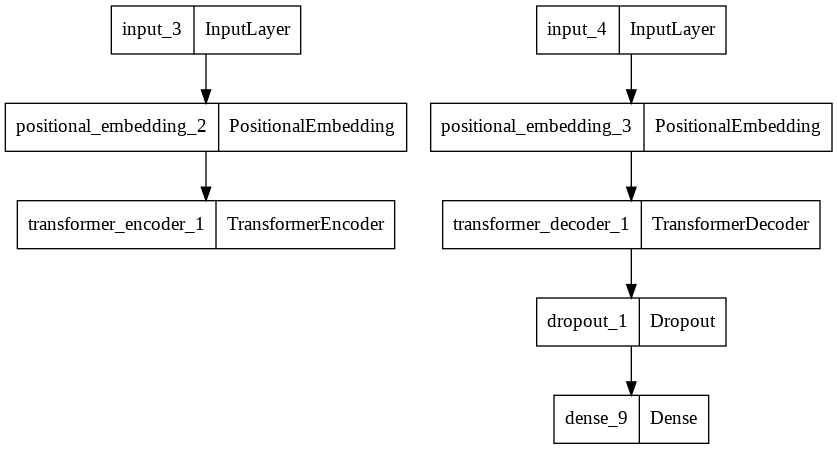

In [ ]:
# ------------------------------------------------------------------------------
# Load "transformer.keras"
transformer = keras.models.load_model(
    "/content/drive/MyDrive/Colab Notebooks/transformer.keras",
    custom_objects={"TransformerEncoder": TransformerEncoder,
                    "PositionalEmbedding": PositionalEmbedding,
                    "TransformerDecoder": TransformerDecoder})
# Load "transformer.keras"
# ------------------------------------------------------------------------------

# ------------------------------------------------------------------------------
# Load test input
test_input = encoder_vectorize(pickle.load(open("/content/drive/MyDrive/Colab Notebooks/DS_5_train_input",'rb')))
# Load test input
# ------------------------------------------------------------------------------

transformer.summary()
tf.keras.utils.plot_model(transformer)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None)]            0         
                                                                 
 positional_embedding_2 (Pos  (None, None, 256)        54528     
 itionalEmbedding)                                               
                                                                 
 transformer_encoder_1 (Tran  (None, None, 256)        2630144   
 sformerEncoder)                                                 
                                                                 
Total params: 2,684,672
Trainable params: 2,684,672
Non-trainable params: 0
_________________________________________________________________


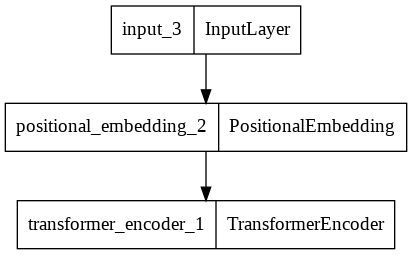

In [ ]:
encoder_input = transformer.get_layer("input_3").input
encoder_ouput = transformer.get_layer("transformer_encoder_1").output
encoder_path = keras.Model(encoder_input,encoder_ouput)
encoder_path.summary()
tf.keras.utils.plot_model(encoder_path)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 positional_embedding_3 (Positi  (None, None, 256)   60928       ['input_4[0][0]']                
 onalEmbedding)                                                                                   
                                                                                                  
 input_1 (InputLayer)           [(None, None, 256)]  0           []                               
                                                                                                  
 transformer_decoder_1 (Transfo  (None, None, 256)   4734208     ['positional_embedding_3[2]

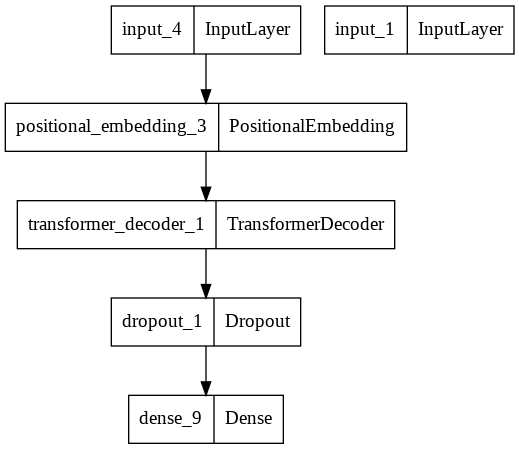

In [ ]:
decoder_input = transformer.get_layer("input_4").input
x = transformer.get_layer("positional_embedding_3")(decoder_input)
encoder_output = transformer.get_layer("transformer_encoder_1").output
x = transformer.get_layer("transformer_decoder_1")(x,encoder_output)
x = transformer.get_layer("dropout_1")(x)
decoder_ouput = transformer.get_layer("dense_9")(x)
decoder_path = keras.Model([decoder_input,encoder_output],decoder_ouput)

decoder_path.summary()
tf.keras.utils.plot_model(decoder_path)

## Test

3 second / sentence

214.8389937877655

144.35569739341736


In [ ]:
import time
start = time.time()
ans = decode_sequence(test_input[0:100])
end = time.time()
print(end - start)

20.29936122894287


In [ ]:
i = 0
print(test_output[i])
print(ans[i][6:])

b f c f b f c d a j e f g c e b g a k i j b d b f a k l m b f b d a h ed ee ef a k k eg a k h eh a e ei c d a f ej ek a g d el 
b f c f b f c d a j e f g c e b g a k i j b d b f a k l m b f b d a h ed ee ef a k k eg a k h eh a e ei c d a f ej ek a g d el end e em end a f d fd a g d ff end e fg end a f d fh a g d fj end e fk end e fl end e fm end e gd end a g a g a g a g h a g a g a f k d a g a g d d d e ej end e k a g a f d d a g a e k d d a g a e l e k c e ej end c e el end a f d a e k a e fj end c e el end c e h c e l c f d d ei end c e el end a f d d d d a f d d a f eh end a f a


In [ ]:
from operator import eq
total = 0.0
correct = 0.0
for i in range(0, 100):
  true = test_output[i].split()
  test = ans[i].split()
  correct = correct + sum(map(eq, true, test))
  total = total + len(test)
print(correct/total)

0.7187198456095207


In [ ]:
test_output = pickle.load(open("/content/drive/MyDrive/Colab Notebooks/DS_5_train_output",'rb')) 